# Lab 2

Author: Ryan Rosiak [rrosiak1@gulls.salisbury.edu]

Date: 9/10/20

Description: First lab for getting familiar with python and jupyter notebooks

In [82]:
from math import sqrt # sqrt Function
from typing import List, Tuple # List/Tuple type hinting
from matplotlib import pyplot as plt # Plotting object

In [99]:
# Vector Class
class Vector:
    def __init__(self, x: int, y: int):
        """Initialize with 2 integer values"""
        self.x = x
        self.y = y
    
    def __repr__(self):
        """toString"""
        return f"Vector x-point: {self.x} - y-point: {self.y}"
    
    def __eq__(self, other):
        """Overloaded == operator"""
        if self.x == other.x and self.y == other.y:
            return True
        return False
        
    def __add__(self, other):
        """Takes another Vector object, returns a Vector"""
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __sub__(self, other):
        """Takes another Vector object, returns a Vector"""
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)
    
    def __mul__(self, other) -> int:
        """Takes another Vector object, returns an int"""
        return self.x * other.x + self.y * other.y
    
    def distance_between(self, second_vector) -> float:
        """Takes another Vector object, returns a float"""
        return sqrt((self.x - second_vector.x)**2 + (self.y - second_vector.y)**2)

In [100]:
first = Vector(1, 10)
second = Vector(3, 5)
print(first, second)

Vector x-point: 1 - y-point: 10 Vector x-point: 3 - y-point: 5


In [101]:
added = first + second
print(f"X coordinate of addition: {added.x} Y coordinate of addition: {added.y}")

X coordinate of addition: 4 Y coordinate of addition: 15


In [102]:
subtracted = first - second
print(f"X coordinate of subtraction: {subtracted.x} Y coordinate of subtraction: {subtracted.y}")

X coordinate of subtraction: -2 Y coordinate of subtraction: 5


In [103]:
dot = first * second
print(f"Dot product of first and second: {dot}")

Dot product of first and second: 53


In [104]:
distance = first.distance_between(second)
print(f"The l2 norm distance between the first and second {distance}")

The l2 norm distance between the first and second 5.385164807134504


In [148]:
# Geometry Function
class Geometry:
    def __init__(self, vertices: List[Vector], pair_vertices: List[Tuple[Vector, Vector]]):
        """Initializes the Geometry class with list of Vectors and a list of Tuple paired Vectors"""
        self.vertices = vertices
        self.pair_vertices = pair_vertices
        
    def __repr__(self):
        """toString"""
        return f"List of vertices: {self.vertices} List of Pairs (faces): {self.pair_vertices}"
    
    def add_face(self, vec1: Vector, vec2: Vector):
        """Adds each vector to the vector list(if they are not already there) and
        then adds a connection between them (if it does not exist already)"""
        if vec1 in self.vertices:
            print(f"{vec1} is already in the vector list")
        else:
            self.vertices.append(vec1)
        if vec2 in self.vertices:
            print(f"{vec2} is already in the vector list")
        else:
            self.vertices.append(vec2)
            
        for i in self.pair_vertices:
            if (vec1, vec2) == i or (vec2, vec1) == i:
                print("Vector pair is already in the list")
                return
        
        self.pair_vertices.append((vec1, vec2))
        
    def is_closed(self) -> bool:
        """Checks to see if the shape that is currently in the Geometry class is 
        closed or not"""
        if len(self.pair_vertices) <= 2:
            return False
        
        copy_vertices_list = [i for i in self.vertices]
        for i in range(len(self.pair_vertices)):
            point1 = self.pair_vertices[i][0]
            point2 = self.pair_vertices[i][1]
            for j in self.pair_vertices:
                if (point1, point2) == j:
                    continue
                if (point1 == j[0] or point1 == j[1]) or (point2 == j[0] or point2 == j[1]):
                    continue
                else:
                    return False
        
        return True
    
    def draw(self):
        """Draws the shape to the screen in a graph using matplotlib"""
        x = []
        y = []
        for i in self.pair_vertices:
            x.append(i[0].x)
            x.append(i[1].x)
            y.append(i[0].y)
            y.append(i[1].y)

        plt.plot(x, y, linewidth="3")
        plt.title("Current Shape")
        plt.xlabel("X Axis")
        plt.ylabel("Y Axis")
        plt.show()

Testing add_face function while using the matplotlib print
Adding some vectors to the Geometry class
Empty Geometry class
List of vertices: [] List of Pairs (faces): []
Vector x-point: 1 - y-point: 2 is already in the vector list
Vector x-point: 5 - y-point: 5 is already in the vector list
Vector x-point: 9 - y-point: 3 is already in the vector list
List of vertices: [Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3] List of Pairs (faces): [(Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5), (Vector x-point: 1 - y-point: 2, Vector x-point: 9 - y-point: 3), (Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3)]


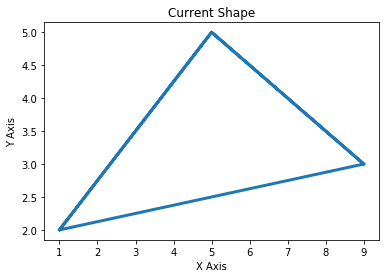

Is g closed? True
Vector x-point: 5 - y-point: 5 is already in the vector list
Vector x-point: 9 - y-point: 3 is already in the vector list
List of vertices: [Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5, Vector x-point: 1 - y-point: 4, Vector x-point: 9 - y-point: 3] List of Pairs (faces): [(Vector x-point: 1 - y-point: 2, Vector x-point: 5 - y-point: 5), (Vector x-point: 1 - y-point: 4, Vector x-point: 9 - y-point: 3), (Vector x-point: 5 - y-point: 5, Vector x-point: 9 - y-point: 3)]


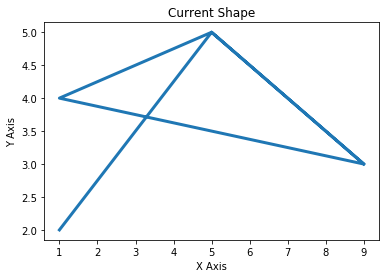

Is f closed? False


In [152]:
print("Testing add_face function while using the matplotlib print")
print("Adding some vectors to the Geometry class")
g = Geometry([], [])
print("Empty Geometry class")
print(g)
g.add_face(Vector(1,2), Vector(5,5))
g.add_face(Vector(1,2), Vector(9,3))
g.add_face(Vector(5,5), Vector(9,3))
print(g)
g.draw()
print(f"Is g closed? {g.is_closed()}")
f = Geometry([], [])
f.add_face(Vector(1,2), Vector(5,5))
f.add_face(Vector(1,4), Vector(9,3))
f.add_face(Vector(5,5), Vector(9,3))
print(f)
f.draw()
print(f"Is f closed? {f.is_closed()}")